### 1. Importing Libraries.

In [1]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install sweetviz

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Importing Libraries
import numpy as np
import pandas as pd

# EDA
import seaborn as sns
import matplotlib.pyplot as plt

# Pre-processing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Clustering
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

import matplotlib.patheffects as path_effects
from matplotlib import colors
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go

from sklearn.cluster import AgglomerativeClustering

#Sweetviz report
import sweetviz as sv

# Pandas profile
from pandas_profiling import ProfileReport

# Avoid warnings
import warnings
warnings.simplefilter("ignore")

### 2. Loading the data set

In [4]:
# Load data
df = pd.read_csv("D:\\DATA SCIENCE\\Project\\Retail Market\\Dataset1.csv")

# Information about the data set

People
●	ID: Customer's unique identifier
●	Year_Birth: Customer's birth year
●	Education: Customer's education level
●	Marital_Status: Customer's marital status
●	Income: Customer's yearly household income
●	Kidhome: Number of children in customer's household
●	Teenhome: Number of teenagers in customer's household
●	Dt_Customer: Date of customer's enrollment with the company
●	Recency: Number of days since customer's last purchase
●	Complain: 1 if the customer complained in the last 2 years, 0 otherwise

Products
●	MntWines: Amount spent on wine in last 2 years
●	MntFruits: Amount spent on fruits in last 2 years
●	MntMeatProducts: Amount spent on meat in last 2 years
●	MntFishProducts: Amount spent on fish in last 2 years
●	MntSweetProducts: Amount spent on sweets in last 2 years
●	MntGoldProds: Amount spent on gold in last 2 years

Promotion
●	NumDealsPurchases: Number of purchases made with a discount
●	AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
●	AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
●	AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
●	AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
●	AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
●	Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

Place
●	NumWebPurchases: Number of purchases made through the company’s website
●	NumCatalogPurchases: Number of purchases made using a catalogue
●	NumStorePurchases: Number of purchases made directly in stores
●	NumWebVisitsMonth: Number of visits to company’s website in the last month

### 3. EDA

In [5]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [6]:
df.shape

(2240, 29)

### Pandas Profile Report:

In [7]:
# pr = ProfileReport(df)
# pr

In [8]:
# # report by sweetviz

# my_report = sv.analyze(df)
# my_report.show_html()

In [9]:
df.sample(5)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
1901  10779        1983  Graduation         Single  22148.0        0   
368    5955        1962  Graduation       Together  72025.0        0   
56    10383        1966  Graduation       Divorced  70287.0        0   
1195   6283        1968      Master       Divorced  63841.0        0   
2096   7428        1975  Graduation       Together  80144.0        0   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
1901         0  13-04-2014       16        15  ...                  7   
368          0  17-11-2012       27       833  ...                  3   
56           0  02-04-2013       30       295  ...                  3   
1195         1  21-04-2013       64       635  ...                  6   
2096         0  30-09-2013       47       240  ...                  1   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
1901             0             0             0             0             0   
368              0             0             0             0             0   
56               0             0             0             0             0   
1195             0             0             0             0             0   
2096             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
1901         0              3         11         0  
368          0              3         11         0  
56           0              3         11         1  
1195         0              3         11         0  
2096         0              3         11         0  

[5 rows x 29 columns]

In [10]:
# set up to view all the info of the columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [11]:
df.sample(5)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
1478  5286        1987      Master         Single  41020.0        0         0   
713   1044        1953  Graduation       Together  58398.0        0         0   
1673  3433        1955    2n Cycle        Married  72635.0        0         0   
2136   271        1969  Graduation          Widow  40590.0        1         1   
638   1907        1950      Master       Divorced  63120.0        0         1   

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
1478  28-10-2013       68       112          1               54   
713   14-05-2013       44       299          5              201   
1673  03-06-2013       54       390         22              323   
2136  02-10-2013       30       154          0               50   
638   28-09-2012       53       965         69              279   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
1478                7                 7            36                  1   
713                21                21            49                  3   
1673              104                35           107                  1   
2136                6                11            37                  5   
638                54                41            69                  5   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
1478                3                    2                  4   
713                 5                    4                  8   
1673                6                    8                  6   
2136                3                    4                  3   
638                 8                    4                  9   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
1478                  3             0             0             0   
713                   4             0             0             0   
1673                  3             0             0             0   
2136                  6             1             0             0   
638                   7             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  
1478             0             0         0              3         11         0  
713              0             0         0              3         11         0  
1673             1             0         0              3         11         0  
2136             0             0         0              3         11         0  
638              0             0         0              3         11         1

In [12]:
options = ['Graduation' ,'PhD'] 
    
# selecting rows based on condition 
rslt_df = df[(df['ID'] == 4141) & 
          df['Education'].isin(options)] 
    
print('\nResult dataframe :\n',
      rslt_df)


Result dataframe :
      ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
2  4141        1965  Graduation       Together  71613.0        0         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
2  21-08-2013       26       426         49              127              111   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
2                21            42                  1                8   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
2                    2                 10                  4             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
2             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
2              3         11         0  


In [13]:
def basic_info(df):
    print("This dfset has ", df.shape[1], " columns and ", df.shape[0], " rows.")
    print("This dfset has ", df[df.duplicated()].shape[0], " duplicated rows.")
    print(" ")
    print("Descriptive statistics of the numeric features in the dfset: ")
    print(" ")
    print(df.describe())
    print(" ")
    print("Information about this dfset: ")
    print(" ")
    print(df.info())

In [14]:
basic_info(df)

This dfset has  29  columns and  2240  rows.
This dfset has  0  duplicated rows.
 
Descriptive statistics of the numeric features in the dfset: 
 
                 ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.9357

In [15]:
df.median()

ID                      5458.5
Year_Birth              1970.0
Income                 51381.5
Kidhome                    0.0
Teenhome                   0.0
Recency                   49.0
MntWines                 173.5
MntFruits                  8.0
MntMeatProducts           67.0
MntFishProducts           12.0
MntSweetProducts           8.0
MntGoldProds              24.0
NumDealsPurchases          2.0
NumWebPurchases            4.0
NumCatalogPurchases        2.0
NumStorePurchases          5.0
NumWebVisitsMonth          6.0
AcceptedCmp3               0.0
AcceptedCmp4               0.0
AcceptedCmp5               0.0
AcceptedCmp1               0.0
AcceptedCmp2               0.0
Complain                   0.0
Z_CostContact              3.0
Z_Revenue                 11.0
Response                   0.0
dtype: float64

In [16]:
df_copy = df.copy()

In [17]:
# Divide the data into two dataframes: one has income values, and the other doesn't.
have_income = df_copy[df_copy.Income.isnull()== False]
missing_income = df_copy[df_copy.Income.isnull()== True]

In [18]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [19]:
# Convert the one that has income to int type
have_income.Income = have_income.Income.astype('int64')

# Give a string value of "0" to missing value, then we can convert it into int type
missing_income.Income = str(have_income.Income.median())

# Coverting String and Float dtypes to int dtype
missing_income.Income = missing_income.Income.str.replace(".5", "")
missing_income.Income = missing_income.Income.astype('int64')

In [20]:
# Combine the data
df_copy = missing_income.append(have_income)

In [21]:
options = ['Graduation' ,'PhD','2n Cycle','Master'] 
    
# selecting rows based on condition 
rslt_df = df_copy[(df_copy['ID'] == 5250) & 
          df_copy['Education'].isin(options)] 
    
print('\nResult dataframe :\n',
      rslt_df)


Result dataframe :
         ID  Year_Birth Education Marital_Status  Income  Kidhome  Teenhome  \
2084  5250        1943    Master          Widow   51381        0         0   

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
2084  30-10-2013       75       532        126              490   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
2084              164               126           126                  1   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
2084                5                    5                 11   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
2084                  1             0             0             1   

      AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  
2084             0             0         0              3         11         1  


In [22]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 10 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2240 non-null   int64 
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWe

#### 1.2 Issue regarding date 

In [23]:
# This function converts a scalar, array-like, Series or DataFrame/dict-like to a pandas datetime object.
df_copy.Dt_Customer = pd.to_datetime(df_copy.Dt_Customer)

In [24]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 10 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   int64         
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nu

### Reset the index

In [25]:
# Reset the index
df_1 = df_copy.reset_index(drop=True)

In [26]:
df_1.sample(5)

ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
1851   8527        1965      Master       Together   65735        1         1   
708    2868        1949         PhD         Single   26518        1         1   
1443   8588        1961  Graduation        Married   60544        1         1   
924    1048        1972      Master        Married   35641        1         0   
1868  10241        1975    2n Cycle       Divorced   11448        0         0   

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
1851  2013-07-12       37       239          7              119   
708   2013-08-04       33        20          1               28   
1443  2012-08-25       92       201          2               43   
924   2013-07-14       11        63          3               67   
1868  2013-12-15       16         0          0                0   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
1851                4                15            11                  5   
708                 3                 3             2                  3   
1443                3                 5            35                  4   
924                 8                 9            28                  2   
1868                6                 2             6                  1   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
1851                6                    2                  6   
708                 2                    0                  3   
1443                5                    1                  5   
924                 3                    1                  4   
1868                1                    0                  2   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
1851                  7             0             0             0   
708                   8             0             0             0   
1443                  6             0             0             0   
924                   7             0             0             0   
1868                  6             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  
1851             0             0         0              3         11         0  
708              0             0         0              3         11         1  
1443             0             0         0              3         11         0  
924              0             0         0              3         11         1  
1868             0             0         0              3         11         0

In [27]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   int64         
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

### 1.2 Visualizations

#### 1.2.1 Check the outliers

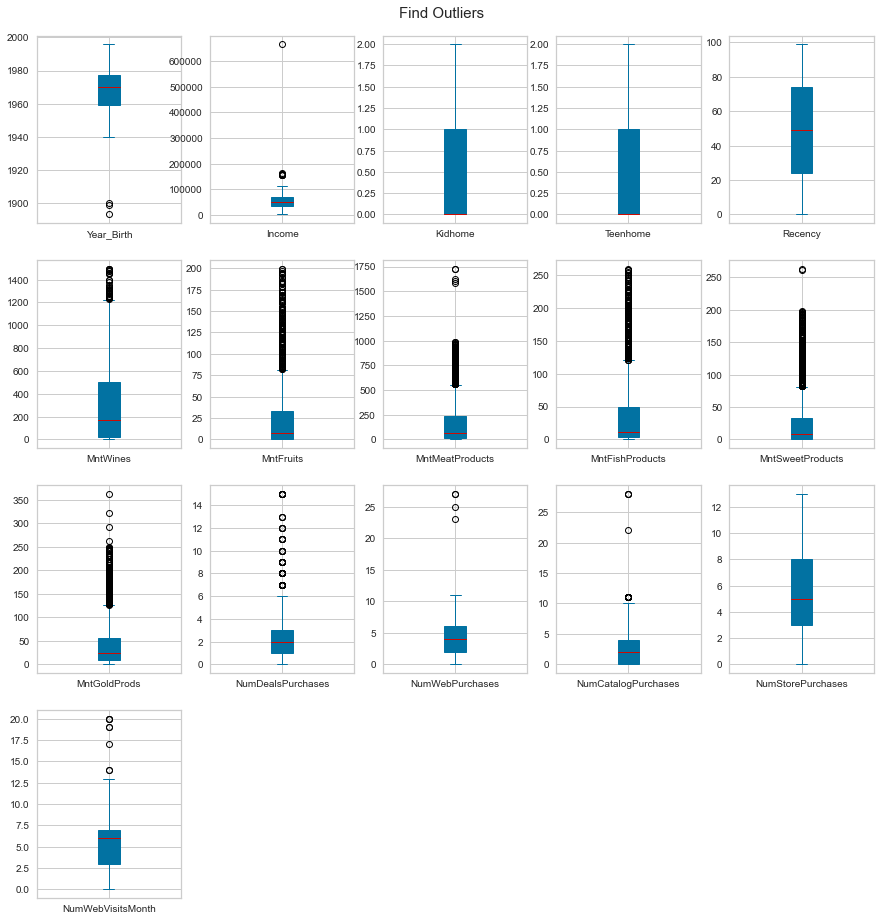

In [28]:
# select columns to plot
# Dropping the categorical columns/ un-useful columns(ID) --> to plot outliers
df_1_to_plot = df_1.drop(columns=['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain','Z_CostContact','Z_Revenue']).select_dtypes(include=np.number)

# subplots: layout=(rows,columns) ; kind='Type of boxblot' ; patch_artist=True (To fill the boxplot with colour)
df_1_to_plot.plot(subplots=True, layout=(5,5), kind='box', figsize=(15,20), patch_artist=True)

plt.suptitle('Find Outliers', fontsize=15, y=0.9)
plt.savefig('boxplots.png', bbox_inches='tight')

### Treating outliers (using emperical formula (µ - 3σ) )

In [29]:
df_1.Year_Birth.describe()

count    2240.000000
mean     1968.805804
std        11.984069
min      1893.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64

In [30]:
# Remove outliers in year_birth -->(µ - 3σ)

df_1 = df_1[df_1.Year_Birth >= (df_1.Year_Birth.mean()-3*df_1.Year_Birth.std())]
df_1.Year_Birth.describe()

count    2237.000000
mean     1968.901654
std        11.701917
min      1940.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64

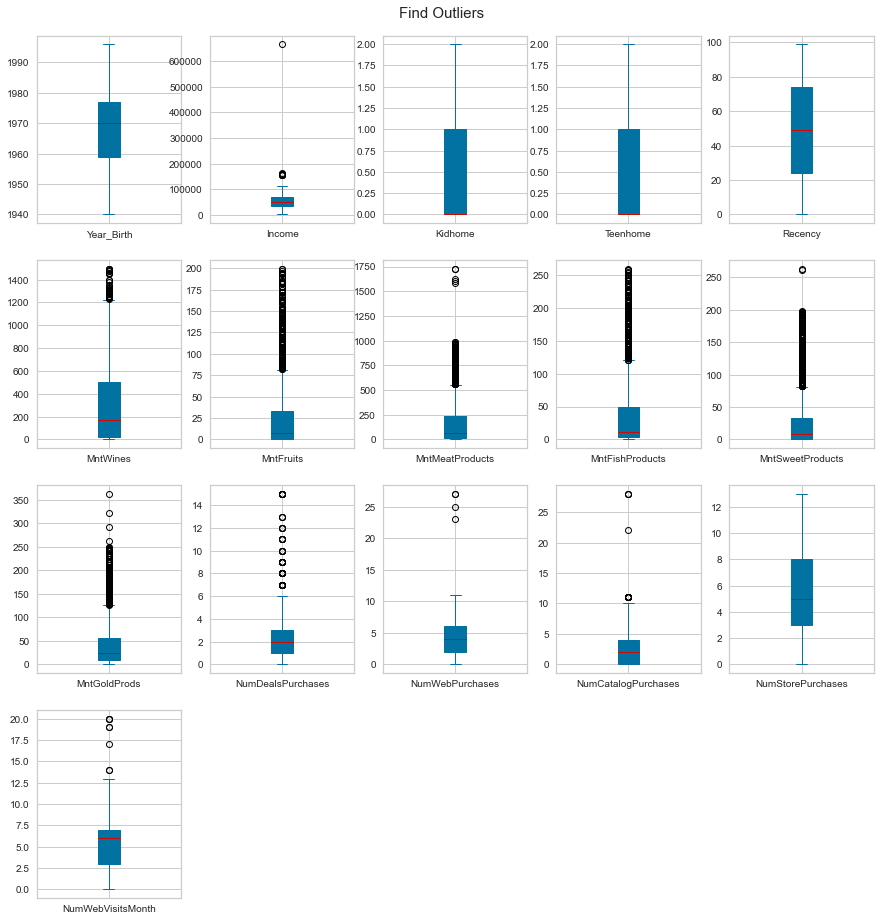

In [31]:
# Outliers after traey=ting on them
df_1_to_plot = df_1.drop(columns=['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain','Z_CostContact','Z_Revenue']).select_dtypes(include=np.number)

# subplots: layout=(rows,columns) ; kind='Type of boxblot' ; patch_artist=True (To fill the boxplot with colour)
df_1_to_plot.plot(subplots=True, layout=(5,5), kind='box', figsize=(15,20), patch_artist=True)

plt.suptitle('Find Outliers', fontsize=15, y=0.9)
plt.savefig('boxplots.png', bbox_inches='tight')

In [32]:
#Feature Engineering
#Age of customer today 
df_1["Age"] = 2021-df_1["Year_Birth"]

#Total spendings on various items
df_1["Total_Spent"] = df_1["MntWines"]+ df_1["MntFruits"]+ df_1["MntMeatProducts"]+ df_1["MntFishProducts"]+ df_1["MntSweetProducts"]+ df_1["MntGoldProds"]

#Deriving living situation by marital status"Alone"
df_1["Living_With"]=df_1["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

#Feature indicating total children living in the household
df_1["Children"]=df_1["Kidhome"]+df_1["Teenhome"]

#Feature for total members in the householde
df_1["Family_Size"] = df_1["Living_With"].replace({"Alone": 1, "Partner":2})+ df_1["Children"]

#Feature pertaining parenthood
df_1["Is_Parent"] = np.where(df_1.Children> 0, 1, 0)

#Segmenting education levels in three groups
df_1["Education"]=df_1["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#For clarity
df_1=df_1.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#Dropping some of the redundant features
to_drop = ["Marital_Status", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
df_1 = df_1.drop(to_drop, axis=1)

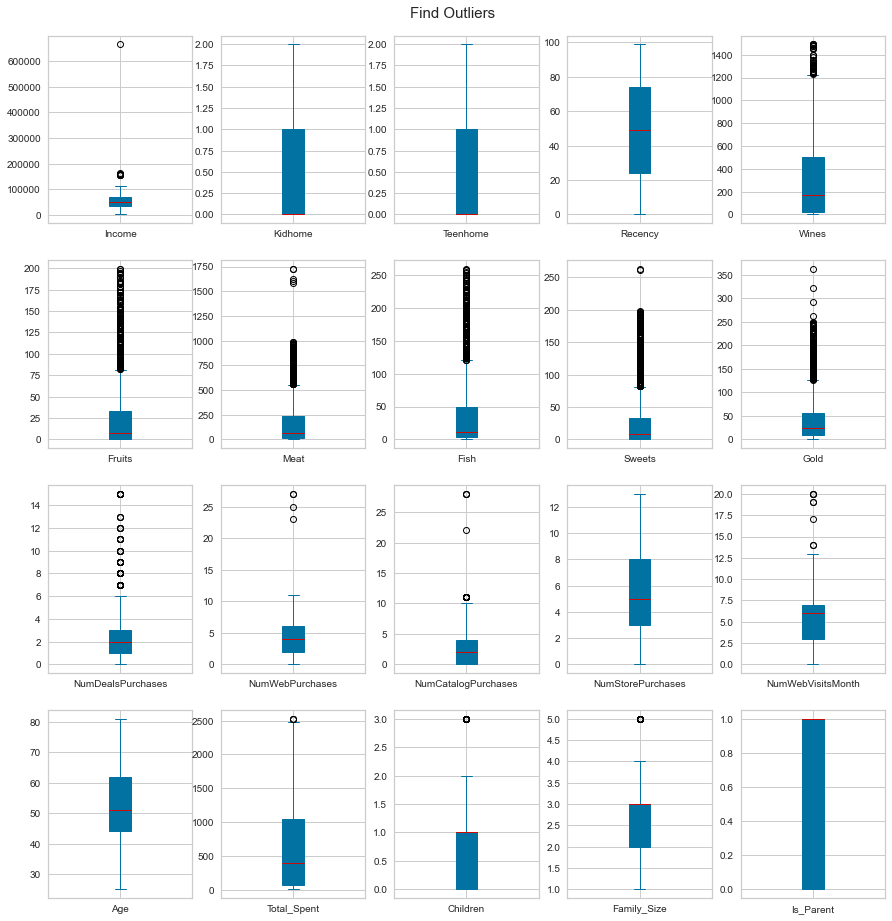

In [33]:
# Outliers after traey=ting on them
df_2_to_plot = df_1.drop(columns=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']).select_dtypes(include=np.number)

# subplots: layout=(rows,columns) ; kind='Type of boxblot' ; patch_artist=True (To fill the boxplot with colour)
df_2_to_plot.plot(subplots=True, layout=(5,5), kind='box', figsize=(15,20), patch_artist=True)

plt.suptitle('Find Outliers', fontsize=15, y=0.9)
plt.savefig('boxplots.png', bbox_inches='tight')

In [34]:
#Dropping the outliers by setting a cap on income. 
df_2 =df_1[(df_1["Income"]<600000)]
print("The total number points after removing the outliers are:", len(df_2))

The total number points after removing the outliers are: 2236


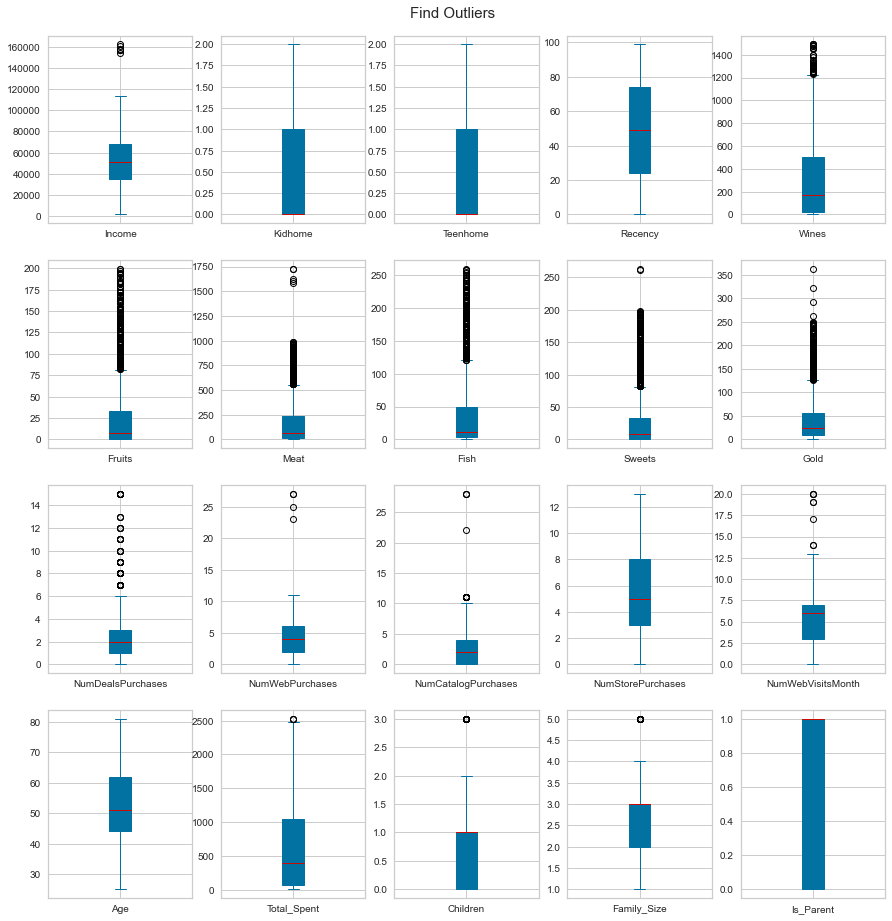

In [35]:
# Outliers after traey=ting on them
df_2_to_plot = df_2.drop(columns=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']).select_dtypes(include=np.number)

# subplots: layout=(rows,columns) ; kind='Type of boxblot' ; patch_artist=True (To fill the boxplot with colour)
df_2_to_plot.plot(subplots=True, layout=(5,5), kind='box', figsize=(15,20), patch_artist=True)

plt.suptitle('Find Outliers', fontsize=15, y=0.9)
plt.savefig('boxplots.png', bbox_inches='tight')

In [36]:
df_2

Education  Income  Kidhome  Teenhome Dt_Customer  Recency  Wines  \
0          Graduate   51381        1         0  2013-11-15       11      5   
1          Graduate   51381        1         0  2013-02-20       19      5   
2      Postgraduate   51381        0         0  2013-05-11       80     81   
3          Graduate   51381        2         1  2014-01-01       96     48   
4          Graduate   51381        1         0  2013-06-17       57     11   
5     Undergraduate   51381        1         0  2012-09-14       25     25   
6      Postgraduate   51381        2         1  2012-11-19        4    230   
7          Graduate   51381        1         1  2014-05-27       45      7   
8      Postgraduate   51381        0         0  2013-11-23       87    445   
9      Postgraduate   51381        0         1  2013-11-07       23    352   
10         Graduate   51381        0         1  2013-11-08       96    231   
11         Graduate   51381        0         0  2013-03-06       69    861   
12         Graduate   51381        1         2  2013-08-23       67    738   
13     Postgraduate   51381        0         1  2013-01-04       39    187   
14         Graduate   51381        1         1  2012-03-09       87     19   
15    Undergraduate   51381        1         1  2014-12-01       49      5   
16     Postgraduate   51381        1         0  2014-02-03       17     25   
17     Postgraduate   51381        1         1  2013-05-18       52    375   
18     Postgraduate   51381        1         0  2013-05-31       82     23   
19         Graduate   51381        1         1  2013-03-03       82     71   
20     Postgraduate   51381        0         1  2013-06-23       83    161   
21         Graduate   51381        0         1  2013-10-18       95    264   
22     Postgraduate   51381        0         0  2013-10-30       75    532   
23    Undergraduate   51381        0         0  2012-12-08       53     32   
24         Graduate   58138        0         0  2012-04-09       58    635   
25         Graduate   46344        1         1  2014-08-03       38     11   
26         Graduate   71613        0         0  2013-08-21       26    426   
27         Graduate   26646        1         0  2014-10-02       26     11   
28     Postgraduate   58293        1         0  2014-01-19       94    173   
29     Postgraduate   62513        0         1  2013-09-09       16    520   
30         Graduate   55635        0         1  2012-11-13       34    235   
31     Postgraduate   33454        1         0  2013-08-05       32     76   
32     Postgraduate   30351        1         0  2013-06-06       19     14   
33     Postgraduate    5648        1         1  2014-03-13       68     28   
34    Undergraduate    7500        0         0  2012-11-13       59      6   
35         Graduate   63033        0         0  2013-11-15       82    194   
36     Postgraduate   59354        1         1  2013-11-15       53    233   
37         Graduate   17323        0         0  2012-10-10       38      3   
38     Postgraduate   82800        0         0  2012-11-24       23   1006   
39         Graduate   41850        1         1  2012-12-24       51     53   
40         Graduate   37760        0         0  2012-08-31       20     84   
41     Postgraduate   76995        0         1  2013-03-28       91   1012   
42    Undergraduate   33812        1         0  2012-03-11       86      4   
43         Graduate   37040        0         0  2012-08-08       41     86   
44         Graduate    2447        1         0  2013-06-01       42      1   
45     Postgraduate   58607        0         1  2012-12-23       63    867   
46     Postgraduate   65324        0         1  2014-11-01        0    384   
47         Graduate   40689        0         1  2013-03-18       69    270   
48         Graduate   18589        0         0  2013-02-01       89      6   
49         Graduate   53359        1         1  2013-05-27        4    173   
50         Graduate   38360     

In [37]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2236 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Education            2236 non-null   object        
 1   Income               2236 non-null   int64         
 2   Kidhome              2236 non-null   int64         
 3   Teenhome             2236 non-null   int64         
 4   Dt_Customer          2236 non-null   datetime64[ns]
 5   Recency              2236 non-null   int64         
 6   Wines                2236 non-null   int64         
 7   Fruits               2236 non-null   int64         
 8   Meat                 2236 non-null   int64         
 9   Fish                 2236 non-null   int64         
 10  Sweets               2236 non-null   int64         
 11  Gold                 2236 non-null   int64         
 12  NumDealsPurchases    2236 non-null   int64         
 13  NumWebPurchases      2236 non-nul

<AxesSubplot:>

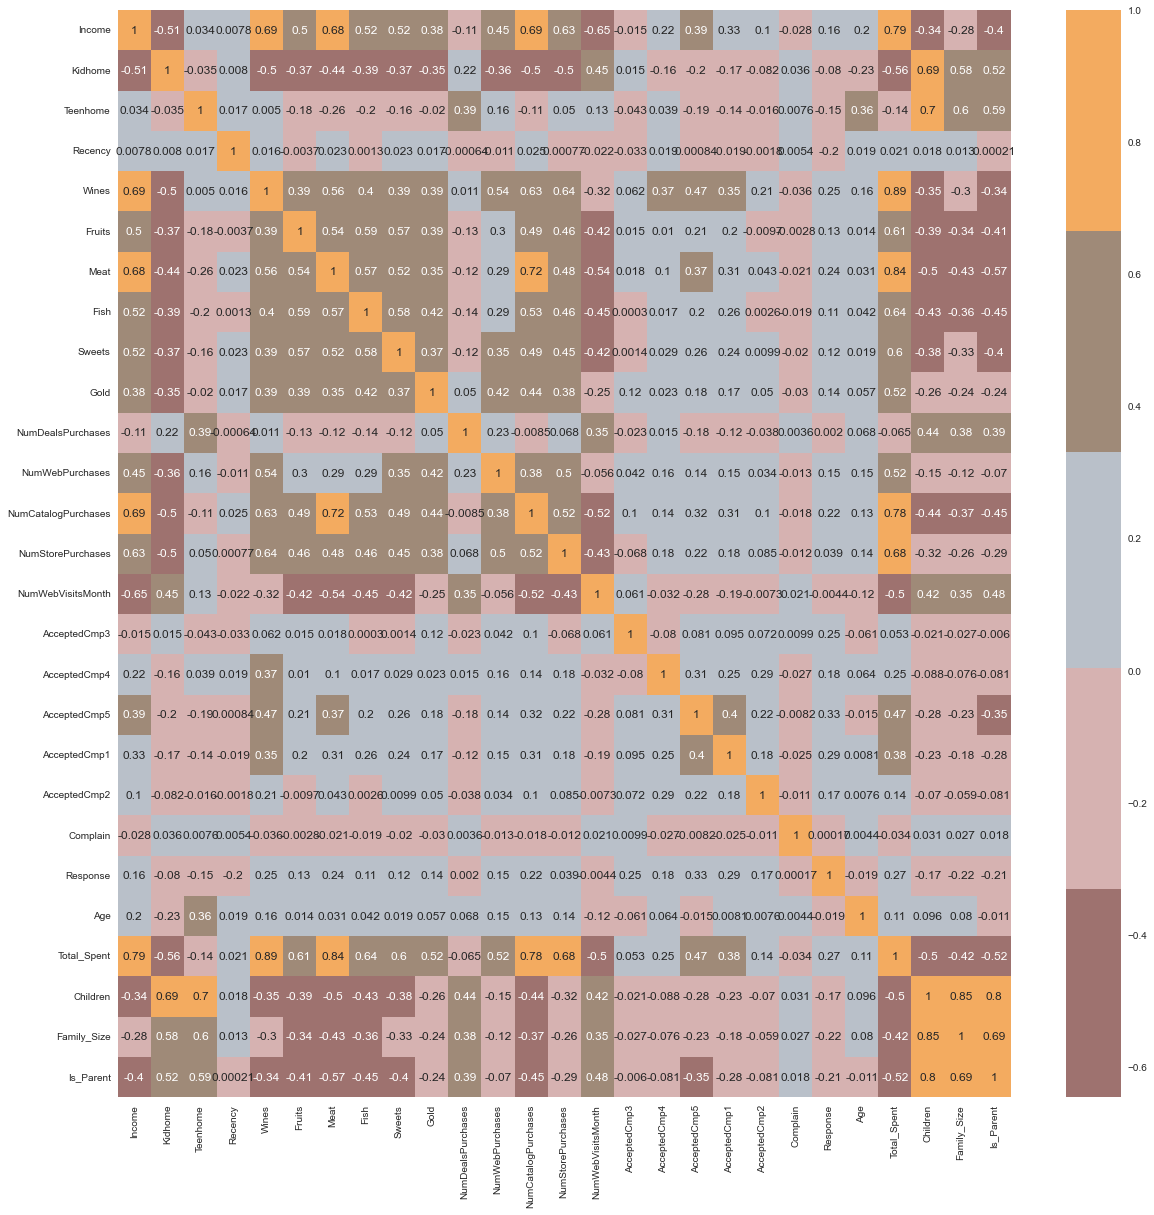

In [38]:
#correlation matrix

cmap =ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

corrmat= df_2.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

### 4. Data Pre-processing

In [39]:
#Get list of categorical variables:

s = (df_2.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Living_With']


In [40]:
#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    df_2[i]= df_2[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

All features are now numerical


In [41]:
df_2.sample(5)

Education  Income  Kidhome  Teenhome Dt_Customer  Recency  Wines  \
403           0   74293        0         0  2014-04-05       66    375   
1985          0   36781        1         0  2014-10-04       16     29   
395           1   36143        1         0  2014-03-30       33     12   
2196          1    8820        1         1  2013-03-22       52     12   
303           2   32414        0         0  2013-04-07       11     20   

      Fruits  Meat  Fish  Sweets  Gold  NumDealsPurchases  NumWebPurchases  \
403      152   335    93      91    81                  1                5   
1985       1    17     0       3    13                  1                2   
395        0     1     0       0     6                  1                0   
2196       0    13     4       2     4                  4                3   
303        6     5     0       9    12                  1                1   

      NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
403                     4                  6                  2             0   
1985                    1                  2                  8             0   
395                     1                  2                  3             0   
2196                    0                  3                  8             0   
303                     0                  3                  7             1   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
403              0             0             0             0         0   
1985             0             0             0             0         0   
395              0             0             0             0         0   
2196             0             0             0             0         0   
303              0             0             0             0         0   

      Response  Age  Total_Spent  Living_With  Children  Family_Size  \
403          0   28         1127            0         0            1   
1985         1   42           63            1         1            3   
395          0   40           19            0         1            2   
2196         0   69           35            0         2            3   
303          0   37           52            1         0            2   

      Is_Parent  
403           0  
1985          1  
395           1  
2196          1  
303           0

In [42]:
#Creating a copy of data
df_std = df_2.copy()

# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response','Dt_Customer']
df_std = df_std.drop(cols_del, axis=1)

#Scaling
scaler = StandardScaler()
scaler.fit(df_std)
scaled_df_std = pd.DataFrame(scaler.transform(df_std),columns= df_std.columns )
print("All features are now scaled")

All features are now scaled


In [43]:
#Scaled data to be used for reducing the dimensionality

print("Dataframe to be used for further modelling:")
scaled_df_std.sample(5)

Dataframe to be used for further modelling:


Education    Income   Kidhome  Teenhome   Recency     Wines    Fruits  \
1321    2.03578  1.067536 -0.824939  0.905974 -1.212964 -0.282683  3.417440   
2105   -0.89438  0.981675 -0.824939  0.905974 -1.662001 -0.434236  0.219666   
1547    0.57070 -0.025301  1.032627  2.742564  1.101307 -0.862149 -0.661610   
235     0.57070 -0.991308  1.032627 -0.930615 -0.176723 -0.443150 -0.636431   
722    -0.89438 -0.078509  1.032627 -0.930615  0.894059 -0.609561 -0.334279   

          Meat      Fish    Sweets      Gold  NumDealsPurchases  \
1321  0.186211  0.063397  3.267586 -0.134160           1.383614   
2105  0.053256 -0.687019 -0.655857  1.556525          -0.168700   
1547 -0.726751 -0.687019 -0.655857 -0.825803          -0.686137   
235  -0.629250 -0.687019 -0.631638 -0.787379           0.866176   
722  -0.447544  0.100003 -0.462106 -0.768166           0.348738   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
1321        -0.031538             1.483544           1.293496   
2105         1.047845            -0.226884           0.678188   
1547        -1.470716            -0.911056          -0.860083   
235         -0.031538            -0.568970          -0.552429   
722         -0.031538            -0.568970          -0.244775   

      NumWebVisitsMonth       Age  Total_Spent  Living_With  Children  \
1321          -1.367850  1.187799     0.355663     0.742041  0.065416   
2105          -0.131421 -0.094180    -0.181122    -1.347635  0.065416   
1547          -0.131421  1.358729    -0.977159    -1.347635  2.724862   
235            1.105008 -0.948832    -0.699626     0.742041  0.065416   
722            0.692865 -1.119763    -0.619856     0.742041  0.065416   

      Family_Size  Is_Parent  
1321     0.445618   0.631169  
2105    -0.656596   0.631169  
1547     1.547831   0.631169  
235      0.445618   0.631169  
722      0.445618   0.631169

### 5. Dimensional Reduction

In [44]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_df_std)
PCA_ds = pd.DataFrame(pca.transform(scaled_df_std), columns=(["col1","col2","col3"]))
PCA_ds.describe().T

count          mean       std       min       25%       50%       75%  \
col1  2236.0  2.284001e-17  2.871932 -5.935933 -2.543719 -0.783657  2.375305   
col2  2236.0  6.355481e-17  1.699340 -4.291063 -1.328506 -0.142901  1.240721   
col3  2236.0  2.442888e-17  1.151358 -2.914861 -0.902453 -0.141495  0.813777   

           max  
col1  7.416533  
col2  6.082442  
col3  3.846864

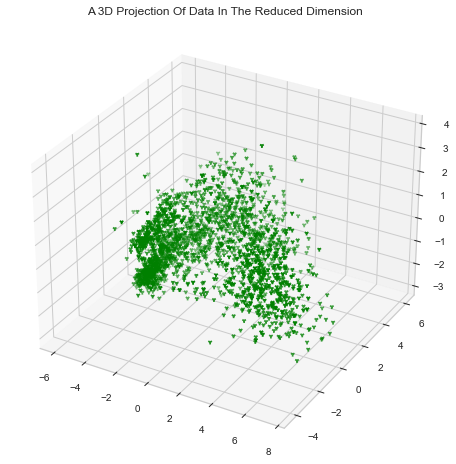

In [54]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]

#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="green", marker="1") # c="colour of points" and marker = "shape of the points ex: circle,square.etc"
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()




In [55]:

#Ploting result data with the use of scatterplot. plotly
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]

fig = go.Figure(data=[go.Scatter3d(
    x=x,y=y,z=z,mode='markers',
    marker=dict(size=6,color='green',opacity=0.8))])

# tight layout
fig.update_layout( title={'text': "3D scatterplot of size-reduced data",'y':0.9,
        'x':0.5,'xanchor': 'center','yanchor': 'top'},
                  margin=dict(l=200, r=220, b=0, t=0))
fig.show()

### 6. Clustering

#### 6.1 Elbow Method --> to determine no. of clusters

Elbow Method to determine the number of clusters to be formed:


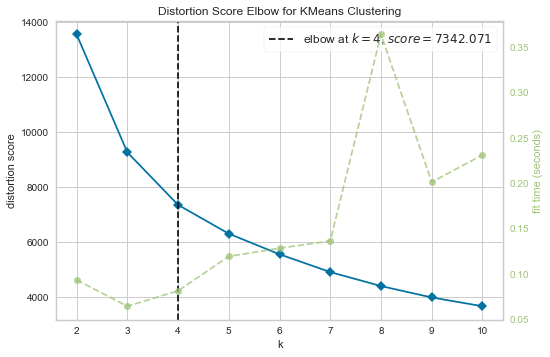

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [46]:
# Elbow method:

print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k = 10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [47]:
#Initiating the Agglomerative Clustering model with k = 4
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
df_2["Clusters"]= yhat_AC

In [48]:
df_2

Education  Income  Kidhome  Teenhome Dt_Customer  Recency  Wines  \
0             0   51381        1         0  2013-11-15       11      5   
1             0   51381        1         0  2013-02-20       19      5   
2             1   51381        0         0  2013-05-11       80     81   
3             0   51381        2         1  2014-01-01       96     48   
4             0   51381        1         0  2013-06-17       57     11   
5             2   51381        1         0  2012-09-14       25     25   
6             1   51381        2         1  2012-11-19        4    230   
7             0   51381        1         1  2014-05-27       45      7   
8             1   51381        0         0  2013-11-23       87    445   
9             1   51381        0         1  2013-11-07       23    352   
10            0   51381        0         1  2013-11-08       96    231   
11            0   51381        0         0  2013-03-06       69    861   
12            0   51381        1         2  2013-08-23       67    738   
13            1   51381        0         1  2013-01-04       39    187   
14            0   51381        1         1  2012-03-09       87     19   
15            2   51381        1         1  2014-12-01       49      5   
16            1   51381        1         0  2014-02-03       17     25   
17            1   51381        1         1  2013-05-18       52    375   
18            1   51381        1         0  2013-05-31       82     23   
19            0   51381        1         1  2013-03-03       82     71   
20            1   51381        0         1  2013-06-23       83    161   
21            0   51381        0         1  2013-10-18       95    264   
22            1   51381        0         0  2013-10-30       75    532   
23            2   51381        0         0  2012-12-08       53     32   
24            0   58138        0         0  2012-04-09       58    635   
25            0   46344        1         1  2014-08-03       38     11   
26            0   71613        0         0  2013-08-21       26    426   
27            0   26646        1         0  2014-10-02       26     11   
28            1   58293        1         0  2014-01-19       94    173   
29            1   62513        0         1  2013-09-09       16    520   
30            0   55635        0         1  2012-11-13       34    235   
31            1   33454        1         0  2013-08-05       32     76   
32            1   30351        1         0  2013-06-06       19     14   
33            1    5648        1         1  2014-03-13       68     28   
34            2    7500        0         0  2012-11-13       59      6   
35            0   63033        0         0  2013-11-15       82    194   
36            1   59354        1         1  2013-11-15       53    233   
37            0   17323        0         0  2012-10-10       38      3   
38            1   82800        0         0  2012-11-24       23   1006   
39            0   41850        1         1  2012-12-24       51     53   
40            0   37760        0         0  2012-08-31       20     84   
41            1   76995        0         1  2013-03-28       91   1012   
42            2   33812        1         0  2012-03-11       86      4   
43            0   37040        0         0  2012-08-08       41     86   
44            0    2447        1         0  2013-06-01       42      1   
45            1   58607        0         1  2012-12-23       63    867   
46            1   65324        0         1  2014-11-01        0    384   
47            0   40689        0         1  2013-03-18       69    270   
48            0   18589        0         0  2013-02-01       89      6   
49            0   53359        1         1  2013-05-27        4    173   
50            0   38360        1         0  2013-05-31       26     36   
51            1   84618        0         0  2013-11-22       96    684   
52            1   10979        0         0  2014-05-22       34      8   
53        

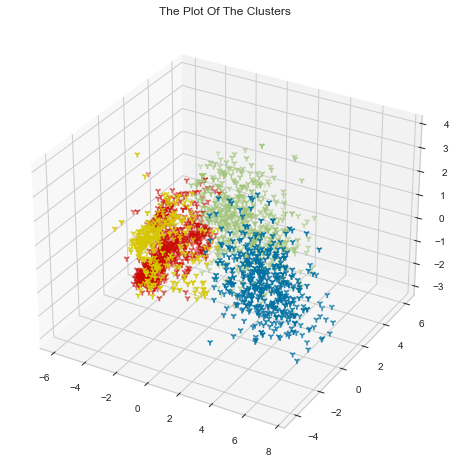

In [56]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
colors = ListedColormap(['r','g','b','y'])
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='1', cmap = colors )
ax.set_title("The Plot Of The Clusters")
plt.show()




In [69]:

#Ploting result data with the use of scatterplot. plotly
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]

 
fig = go.Figure(data=[go.Scatter3d(
    x=x,y=y,z=z,mode='markers',
    marker=dict(size=6,color=x,opacity=0.8))])

# tight layout
fig.update_layout( title={'text': "3D scatterplot of size-reduced data",'y':0.9,
        'x':0.5,'xanchor': 'center','yanchor': 'top'},
                  margin=dict(l=200, r=220, b=0, t=0))
fig.show()

### Visualizing the Clusters

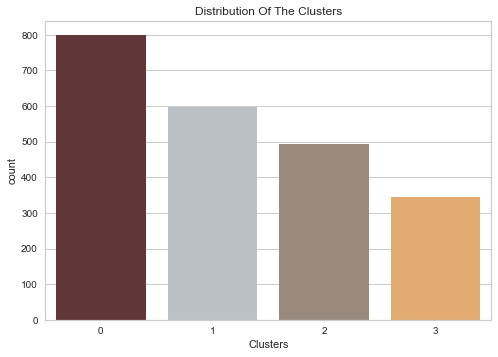

In [50]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=df_2["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

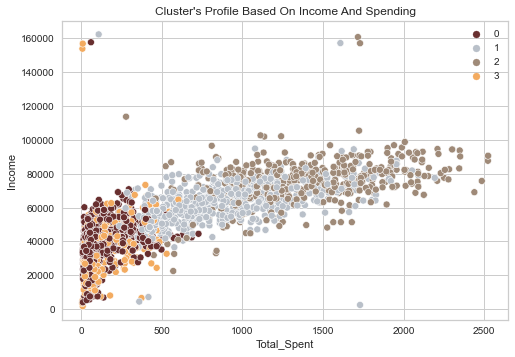

In [51]:
pl = sns.scatterplot(data= df_2,x=df_2["Total_Spent"], y=df_2["Income"],hue=df_2["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()


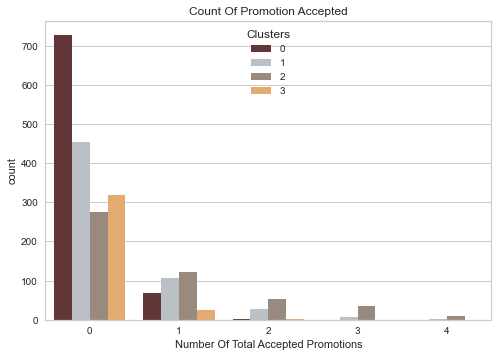

In [52]:
#Creating a feature to get a sum of accepted promotions 
df_2["Total_Promos"] = df_2["AcceptedCmp1"]+ df_2["AcceptedCmp2"]+ df_2["AcceptedCmp3"]+ df_2["AcceptedCmp4"]+ df_2["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=df_2["Total_Promos"],hue=df_2["Clusters"], palette= pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

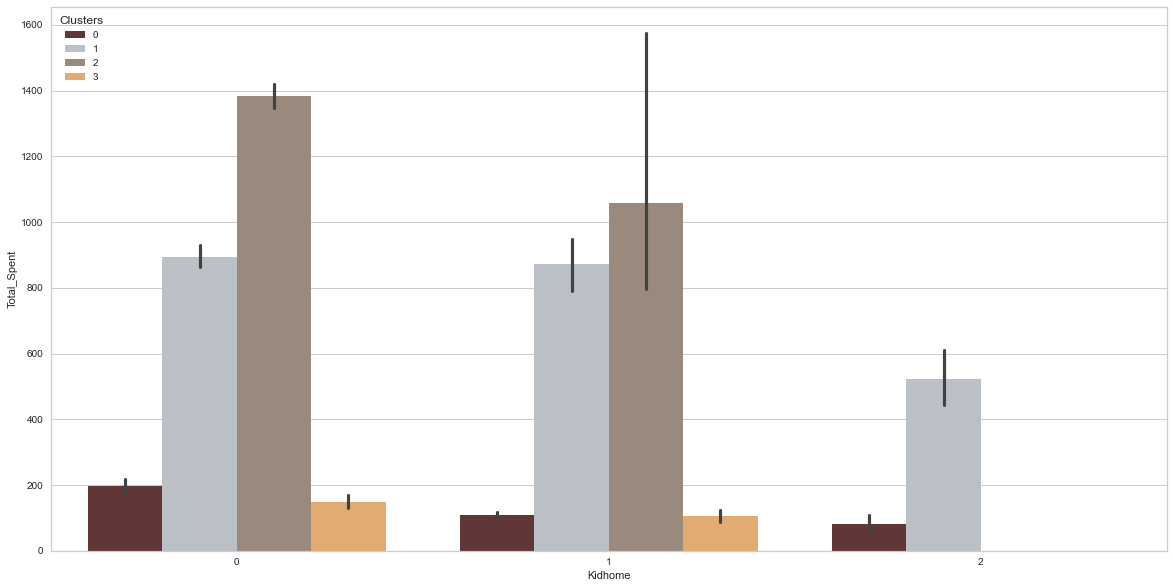

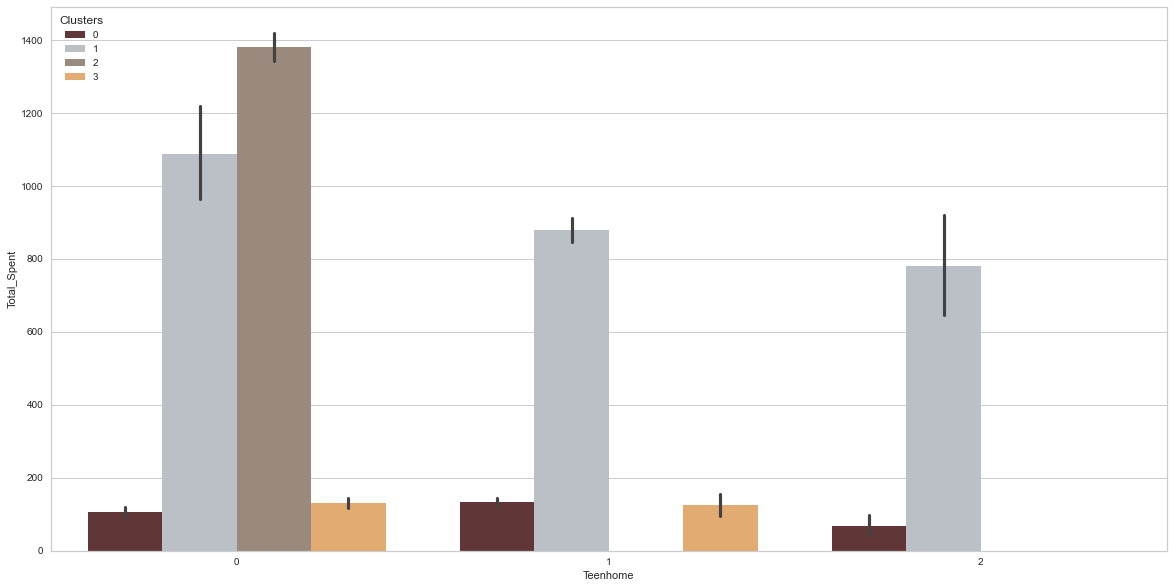

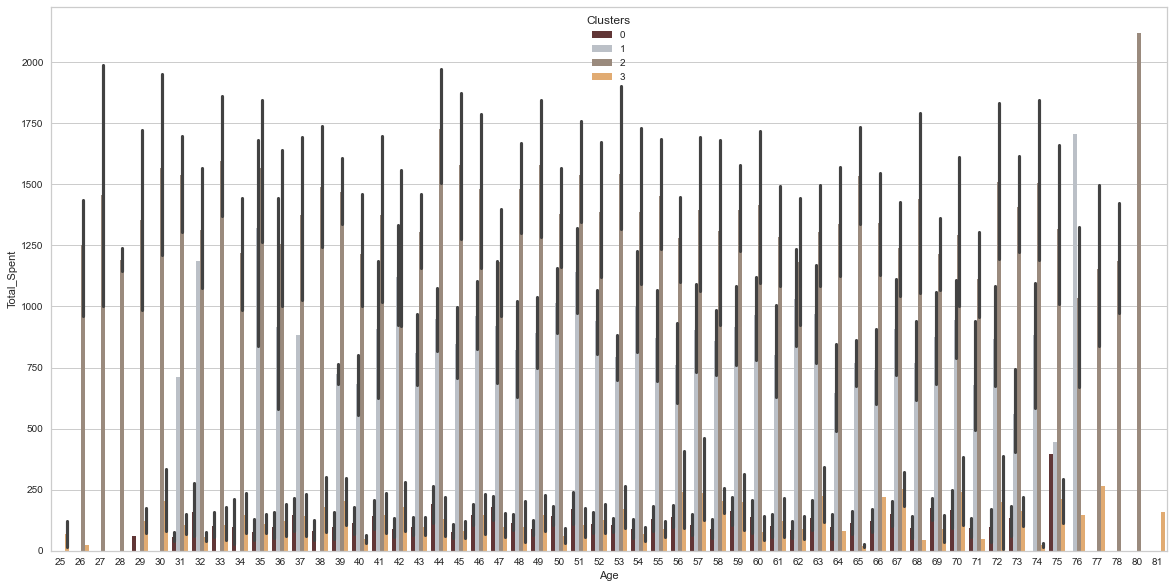

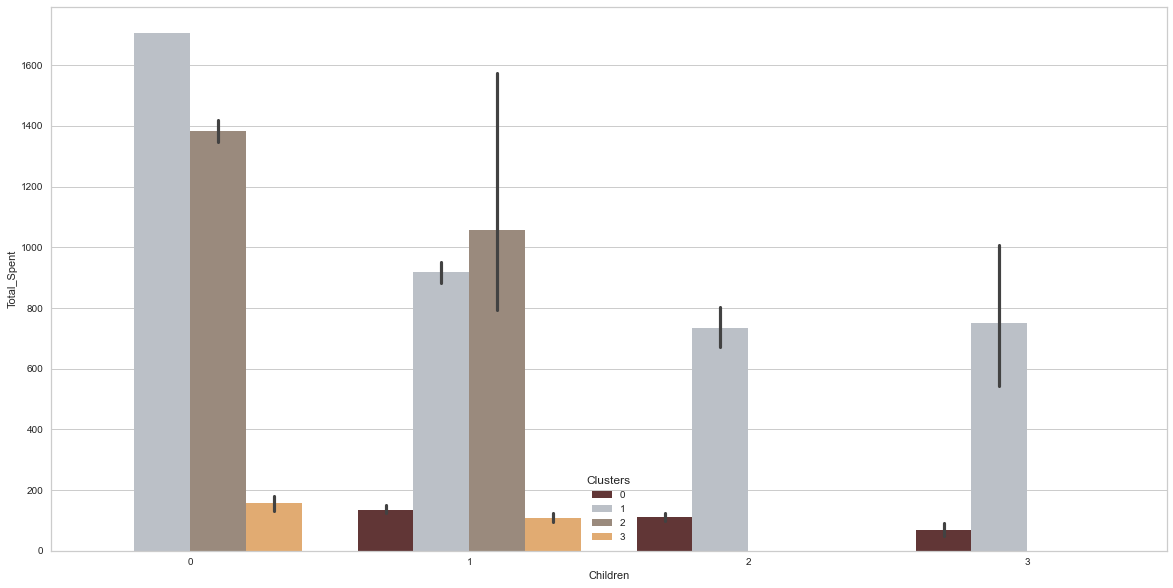

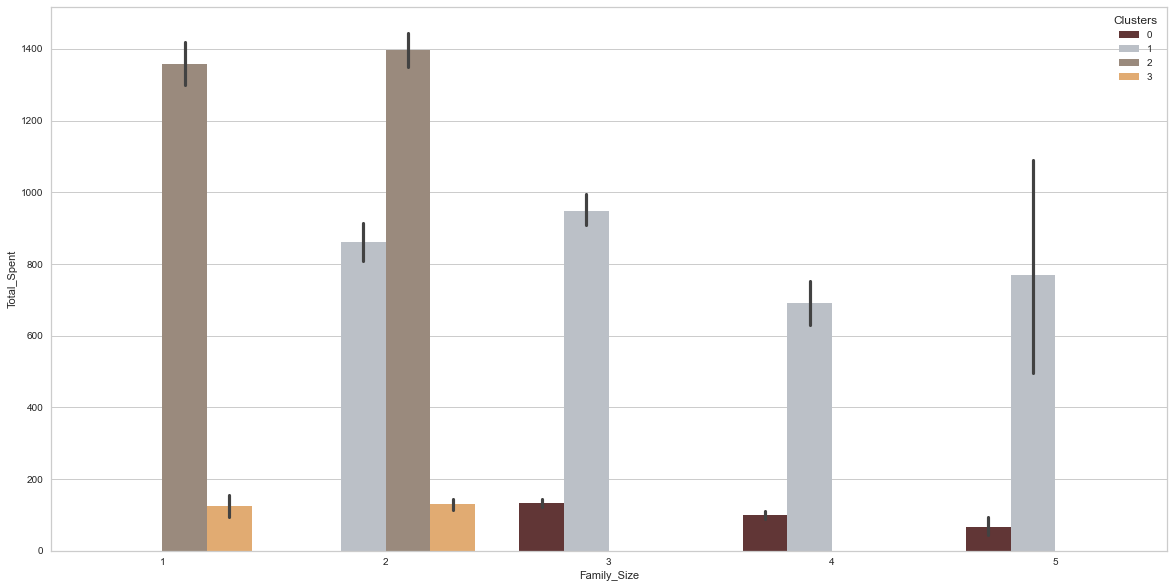

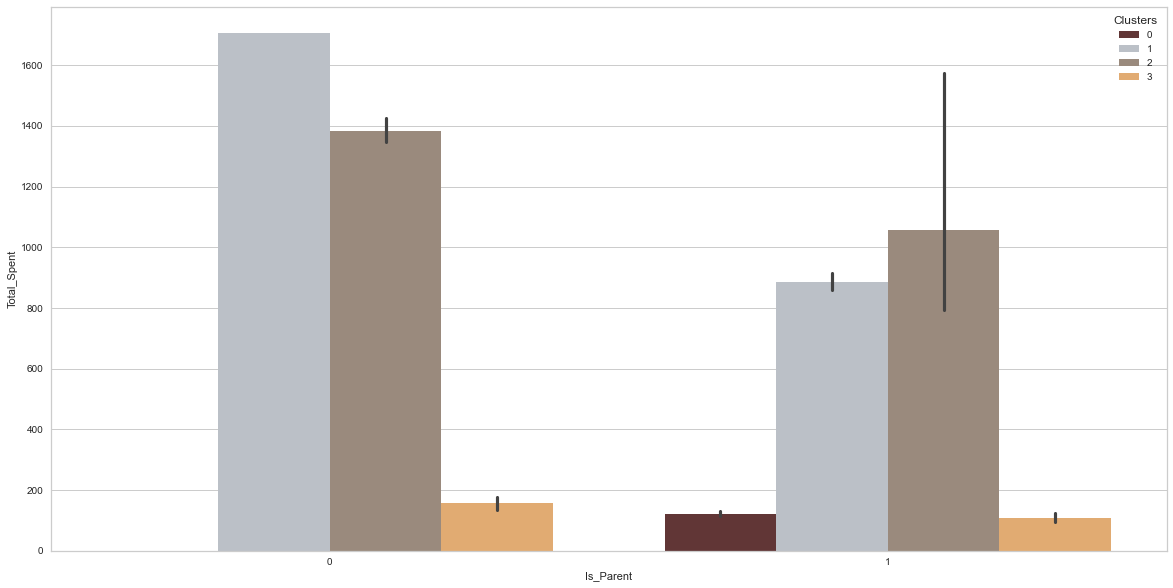

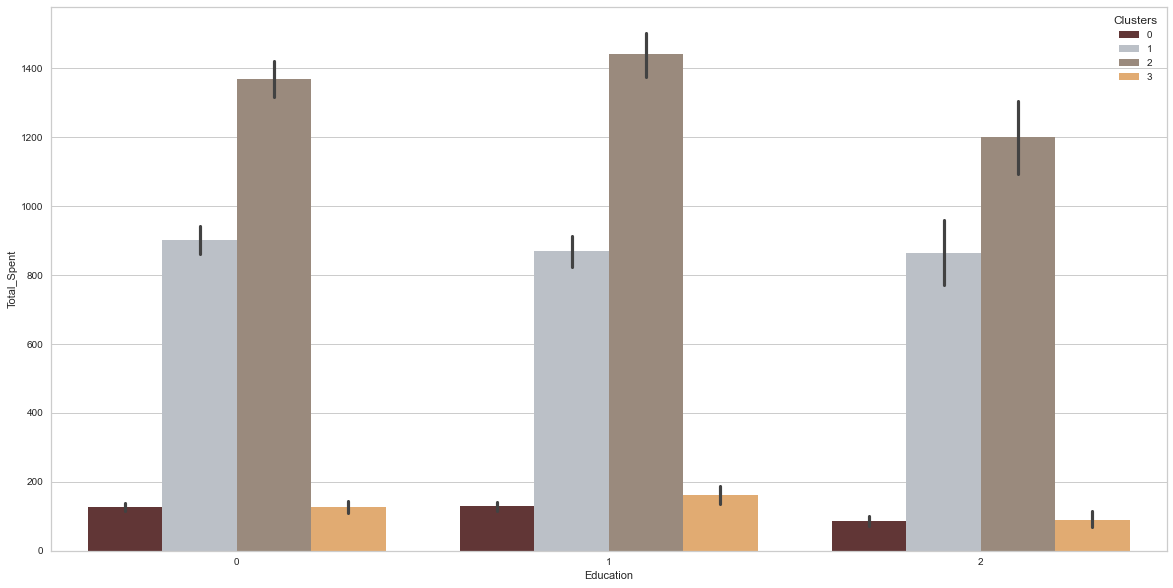

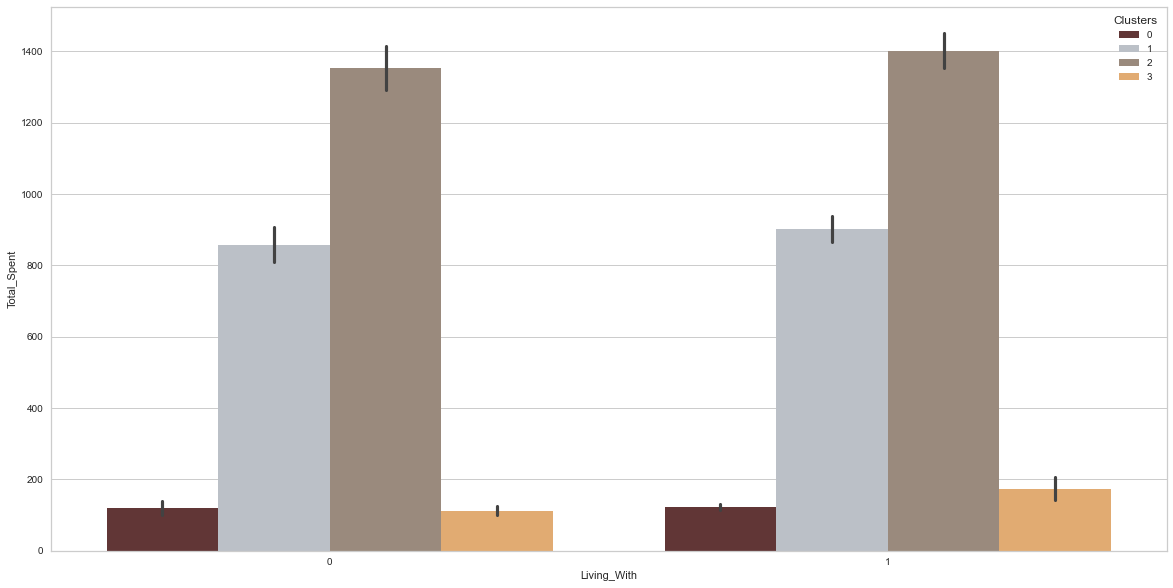

In [53]:
Personal = [ "Kidhome","Teenhome", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]

for i in Personal:
    plt.figure(figsize=(20,10))
    sns.barplot(x=df_2[i], y=df_2["Total_Spent"], hue =df_2["Clusters"], palette=pal)
    plt.show()

In [ ]:
the end 